In [7]:
import pandas as pd

In [21]:
df = pd.read_csv('eds-220-lesson2-pandas/glacial_loss.csv')

In [22]:
df.head()

,year,europe,arctic,alaska,asia,north_america,south_america,antarctica,global_glacial_volume_change,annual_sea_level_rise,cumulative_sea_level_rise
0,1961,-5.128903,-108.382987,-18.721190,-32.350759,-14.359007,-4.739367,-35.116389,-220.823515,0.610010,0.610010
1,1962,5.576282,-173.252450,-24.324790,-4.675440,-2.161842,-13.694367,-78.222887,-514.269862,0.810625,1.420635
2,1963,-10.123105,-0.423751,-2.047567,-3.027298,-27.535881,3.419633,3.765109,-550.575640,0.100292,1.520927
3,1964,-4.508358,20.070148,0.477800,-18.675385,-2.248286,20.732633,14.853096,-519.589859,-0.085596,1.435331
4,1965,10.629385,43.695389,-0.115332,-18.414602,-19.398765,6.862102,22.793484,-473.112003,-0.128392,1.306939


<AxesSubplot:>

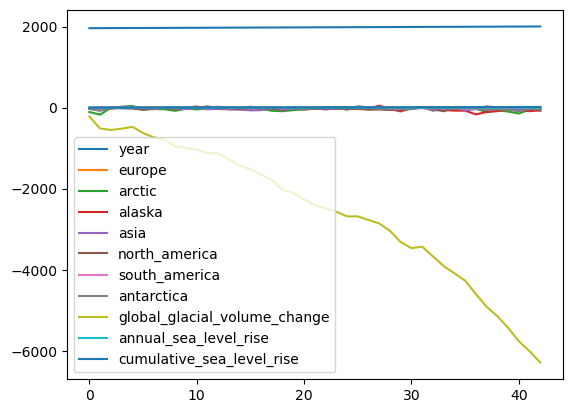

In [11]:
# one line plot per column with numeric data - a mess
df.plot()

<AxesSubplot:xlabel='year'>

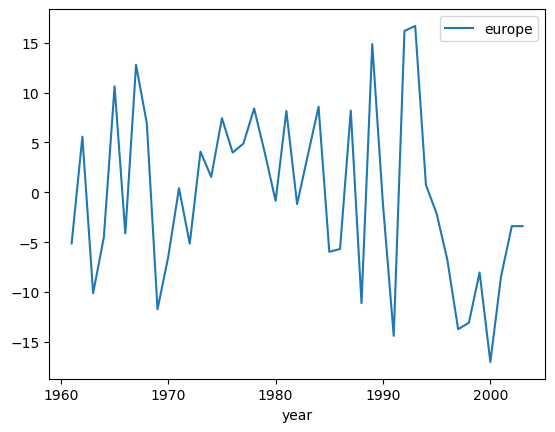

In [13]:
df.plot(x='year', y='europe')

## check-in

1. Plot a graph of the annual sea level rise with respect to years

2. In the following code, what information is stored in the columns variable? Describe what we are plotting.

<AxesSubplot:xlabel='year'>

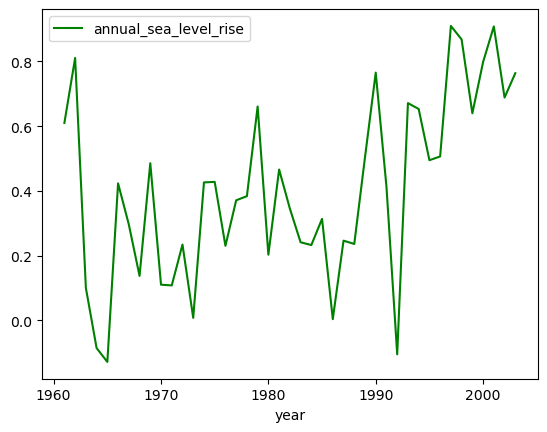

In [16]:
# plot annual sea level rise with respect to years
df.plot(x = 'year',
       y = 'annual_sea_level_rise',
       color = 'green')

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

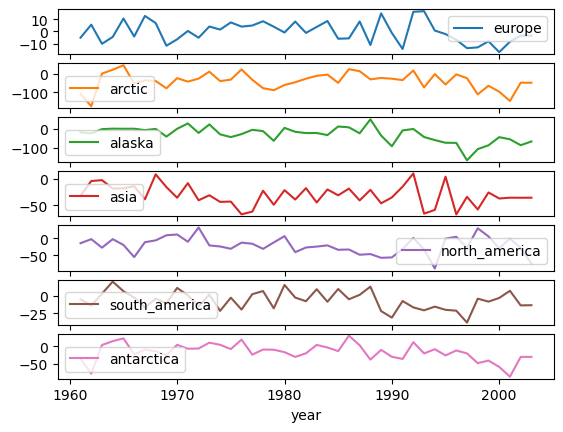

In [17]:
# grabs all of the rows and the columns from europe- antarctica, then adding .columns just adds the column names
columns = df.loc[:, 'europe':'antarctica'].columns 

df.plot(x = 'year',
       y = columns,
       subplots = True)

In [20]:
df.loc[:, 'europe':'antarctica'].columns

Index(['europe', 'arctic', 'alaska', 'asia', 'north_america', 'south_america',
       'antarctica'],
      dtype='object')

## Palmer Penguins

read in the data from the following url:

bit.ly/palmer-penguins-csv

In [24]:
# read in data
penguins = pd.read_csv('https://bit.ly/palmer-penguins-csv')

# explore
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [25]:
# check column datatype
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [26]:
# simple statistics about numeric colimns
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [28]:
# for categorical data and year, get the count of unique values, select the categorical variables first
penguins[['species', 'island', 'sex', 'year']].nunique()

species    3
island     3
sex        2
year       3
dtype: int64

In [30]:
# get unique values for specific columns
print(penguins.species.unique())

['Adelie' 'Gentoo' 'Chinstrap']


In [31]:
# get the unique value counts for species
penguins.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

# `kind()` argument in `plot()`

default is creating a plot, kind is the parameter that controls what kind of plot we get


# scatter plots

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

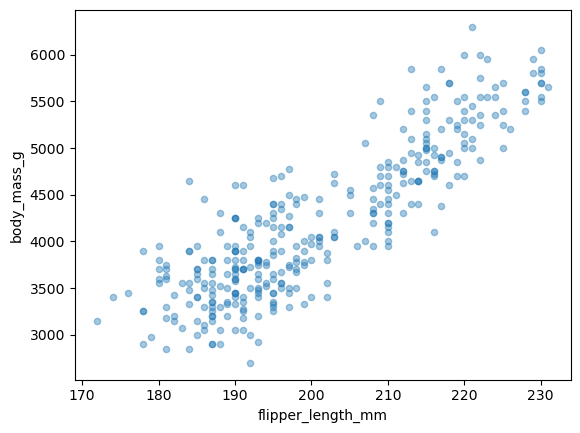

In [33]:
penguins.plot(kind = 'scatter',
             x = 'flipper_length_mm',
             y = 'body_mass_g',
             alpha = 0.4)

## bar plot

Set `kind` = `bar` in the `plot()` method

In [41]:
# find 10 penguins with the lowest body mass and visualize it, then sort in descending order
smallest = penguins.body_mass_g.nsmallest(10).sort_values()
smallest

314    2700.0
58     2850.0
64     2850.0
54     2900.0
98     2900.0
116    2900.0
298    2900.0
104    2925.0
47     2975.0
44     3000.0
Name: body_mass_g, dtype: float64

In [37]:
type(smallest)

pandas.core.series.Series

<AxesSubplot:>

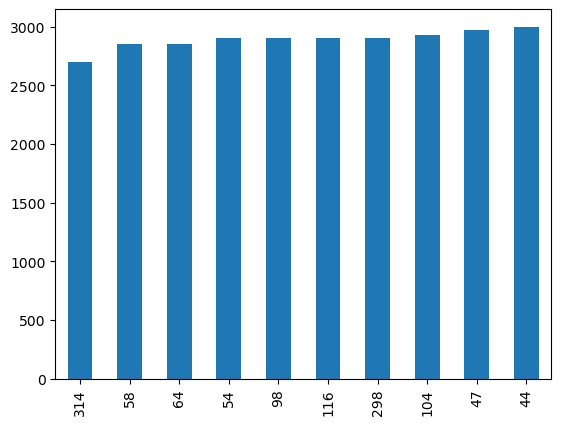

In [38]:
# bar plot
smallest.plot(kind = 'bar')

What if we wanted to look at other data for the smallest penguins?
Use the `index` of the smallest series to select those rows in the original dataframe

In [39]:
# using the index of another series to subselect rows from a dataframe
penguins.loc[smallest.index]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
314,Chinstrap,Dream,46.9,16.6,192.0,2700.0,female,2008
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,female,2008
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,female,2008
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,female,2008
98,Adelie,Dream,33.1,16.1,178.0,2900.0,female,2008
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,female,2009
298,Chinstrap,Dream,43.2,16.6,187.0,2900.0,female,2007
104,Adelie,Biscoe,37.9,18.6,193.0,2925.0,female,2009
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
44,Adelie,Dream,37.0,16.9,185.0,3000.0,female,2007


# Histogram

set kind = hist in plot()

<AxesSubplot:ylabel='Frequency'>

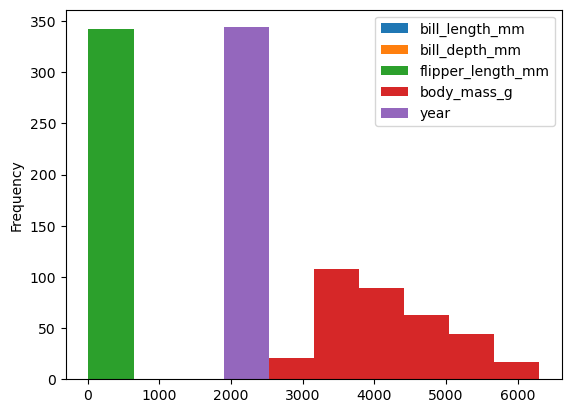

In [42]:
# using plot without subsetting data - a mess
penguins.plot(kind = 'hist')

<AxesSubplot:title={'center':'penguin flipper length distribution'}, ylabel='Frequency'>

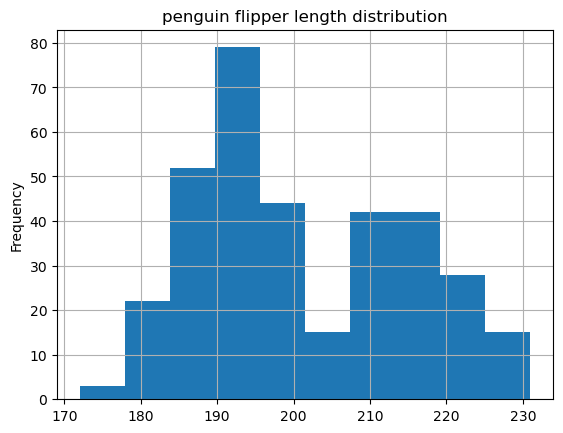

In [46]:
# distribution of flipper length measurements
penguins.flipper_length_mm.plot(kind = 'hist',
                               title = 'penguin flipper length distribution',
                               xlabel = 'flipper length (mm)',
                               grid = True)

## Check-in

In [49]:
penguins_sub = penguins[['bill_length_mm', 'bill_depth_mm']]
penguins_sub

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
3,NaN,NaN
4,36.7,19.3
...,...,...
339,55.8,19.8
340,43.5,18.1
341,49.6,18.2
342,50.8,19.0


bill_length_mm       AxesSubplot(0.125,0.11;0.352273x0.77)
bill_depth_mm     AxesSubplot(0.547727,0.11;0.352273x0.77)
dtype: object

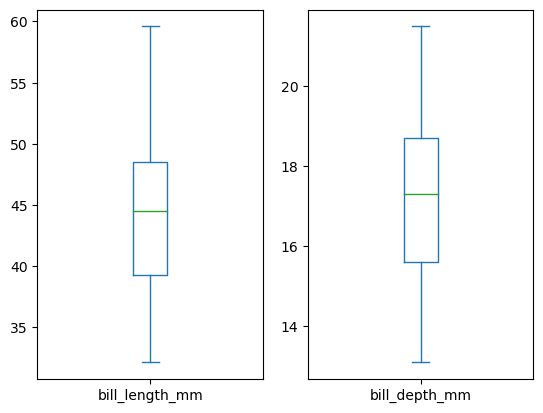

In [52]:
penguins_sub.plot(kind = 'box',
                 subplots = True)

In [53]:
# select rows and columns to create a histogram of the flipper length of gentoo penguins
gentoo = penguins.loc[penguins['species']=='Gentoo', 'flipper_length_mm']

<AxesSubplot:ylabel='Frequency'>

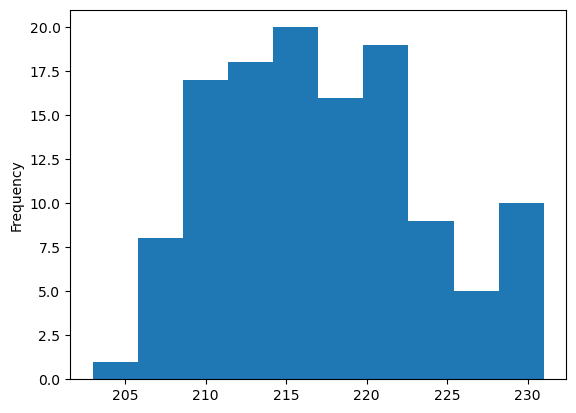

In [55]:
gentoo.plot(kind = 'hist')